### PyTorch Tutorial
```
- Machine Learning, Innopolis University 
- Professor: Adil Khan 
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>



## <center> Linear Regression with Numpy<center>

In [7]:
import numpy as np
from matplotlib import pyplot as plt 
np.random.seed(73)

### Data Generation

In [9]:
# Data Generation
def generate_data(size = 100):
  x = np.random.rand(size, 1)
  y = 3 + 2.5 * x + .1 * np.random.randn(size, 1)

  # Shuffles the indices
  idx = np.arange(size)
  np.random.shuffle(idx)

  # split to train and validation 80:20
  split = int(size * 0.8)
  train_idx = idx[:split]
  val_idx = idx[split:]

  # Generate train and validation sets
  x_train, y_train = x[train_idx], y[train_idx]
  x_val, y_val = x[val_idx], y[val_idx]

  return x_train, y_train, x_val, y_val

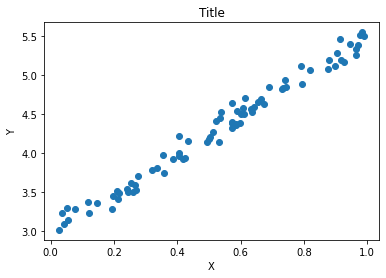

In [10]:
x_train, y_train, x_val, y_val = generate_data()
plt.scatter(x_train, y_train)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Title")
plt.show()

## Gradient Descent

Gradient descent consist of 3 basic steps : 

1. **Compute the Loss**

$$ \hat{y} = a + bx + \epsilon $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)^2 $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - a - bx_i)^2 $$

2. **Compute the Gradients** : A gradient is a partial derivative. Using the chain rule the final expression came to be : 

$$\frac{\partial \text{MSE}}{\partial a} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial a} = -2 * \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)$$

$$\frac{\partial \text{MSE}}{\partial b} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial b} = -2 * \frac{1}{N} \sum_{i} x_i(y_i - \hat{y}_i)$$

3. **Update the Parameters**

$$a = a - \alpha \frac{\partial \text{MSE}}{\partial a}$$

$$b = b - \alpha \frac{\partial \text{MSE}}{\partial b}$$

4. Repeat step 1 to 3 till convergence is reached

In [ ]:
# Initializes parameters "a" and "b" randomly

a = np.random.randn(1)
b = np.random.randn(1)

print(f"Initial values of [a, b] : [{a[0]}, {b[0]}]")

learning_rate = 1e-1 #learning rate
n_epochs = 1000

for epoch in range(n_epochs):
  
  # Step 1: Computes y hat
  yhat = a + b * x_train
  
  # Compute error and Loss using MSE 
  error = (y_train - yhat)
  loss = (error ** 2).mean()
  
  # Step 2: Compute gradients for both "a" and "b" parameters (partial derivatives)
  a_grad = -2 * error.mean()
  b_grad = -2 * (x_train * error).mean()
  
  # Step 3: Update parameters using gradients and the learning rate
  a = a - learning_rate * a_grad
  b = b - learning_rate * b_grad
    
print(f"Final values of [a, b] : [{a[0]}, {b[0]}]")

Initial values of [a, b] : [-1.389528167189103, 1.2528595392468875]
Final values of [a, b] : [2.9818223574919154, 2.506904792435268]


## PyTorch implementation

1. Simple model using nn.Sequential(..)
1. Read input data from file 
1. Add Tensorboard
1. Transfer Learning

In [1]:
import torch 
from torch import nn
import torch.optim as optim # for optimizer
from torch.utils.tensorboard import SummaryWriter #for Tensorboard

In [3]:
class LinearRegression(nn.Module):
  def __init__(self,input_dim=1,output_dim=1):
    super(LinearRegression, self).__init__()
    self.layer1 = nn.Linear(input_dim, output_dim)
  def forward(self, x):
    x = self.layer1(x)
    return x

model1 = nn.Sequential(nn.Linear(1, 1)).double()
model2 = LinearRegression(1,1).double()
model3 = nn.Linear(1, 1).double()
print(model1)
print(model2)
print(model3)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)
LinearRegression(
  (layer1): Linear(in_features=1, out_features=1, bias=True)
)
Linear(in_features=1, out_features=1, bias=True)


In [4]:
print(model2.layer1.weight.item())
print(model1[0].weight.item())
print(model3.weight.item())

-0.9082623720169067
0.7466845512390137
-0.3969125747680664


In [5]:
a = model1(torch.from_numpy(x_train))
error = (torch.from_numpy(y_train) - a)
loss = (error ** 2).mean()
loss.backward()
model1[0].weight.grad

NameError: ignored

In [ ]:
a = model1(torch.from_numpy(x_train))
error = (torch.from_numpy(y_train) - a)
loss = (error ** 2).mean()
loss.backward()
model1[0].weight.grad

tensor([[-10.3959]], dtype=torch.float64)

In [ ]:
model1[0].weight.grad

tensor([[-10.3959]], dtype=torch.float64)

In [ ]:
model1[0].weight

Parameter containing:
tensor([[-0.3180]], dtype=torch.float64, requires_grad=True)

In [ ]:
lr = 1e-1
n_epochs = 100
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model1.parameters(), lr=lr)

In [ ]:
optimizer.step()

In [ ]:
optimizer.zero_grad()

## Transfer Learning

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch. utils.data import DataLoader


### Read Data from local Folder

In [ ]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60027, done.
remote: Total 60027 (delta 0), reused 0 (delta 0), pack-reused 60027
Receiving objects: 100% (60027/60027), 19.94 MiB | 34.90 MiB/s, done.
Resolving deltas: 100% (59990/59990), done.
Checking out files: 100% (60001/60001), done.


In [ ]:
transform = transforms.Compose( [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.ImageFolder(root='/content/CIFAR-10-images/train', transform=transform)
trainloader = trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='/content/CIFAR-10-images/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

## Create a CNN Model, Train and Test

In [ ]:
def train(model, device, train_loader, optimizer, criterion):
    model.train()
    tot_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
      data, target = data.to(device), target.to(device)
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output, target)
      tot_loss += loss.item()
      loss.backward()
      optimizer.step()

    return tot_loss/len(train_loader)
            
def test(model, device, test_loader, criterion):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for data in testloader:
      images, labels = data
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  
  return correct / total


In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_cnn = Net().to(device)

In [ ]:
model_cnn

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
epochs = 5
lr=0.001
momentum=0.9
criterion = nn.CrossEntropyLoss()

# training CNN model
optimizer = optim.SGD(model_cnn.parameters(), lr=lr, momentum=momentum)

for epoch in range(1, epochs + 1):
  t_loss = train(model_cnn, device, trainloader, optimizer, criterion)
  acc = test(model_cnn, device, testloader, criterion)
  break

print(acc)



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


0.4681


## Add TensorBoard

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

In [ ]:
# training CNN model
model_cnn = Net().to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=lr, momentum=momentum)
epochs = 5
for epoch in range(1, epochs + 1):
    t_loss = train(model_cnn, device, trainloader, optimizer, criterion)
    acc = test(model_cnn, device, testloader, criterion)

    writer.add_scalar("train_loss", t_loss, epoch)
    writer.add_scalar("test_acc", acc, epoch)

    for tag, parm in model_cnn.named_parameters():
        writer.add_histogram(tag, parm.grad.data.cpu().numpy(), epoch)

In [ ]:
# %tensorboard --logdir runs/

## Use pretrained Models

In [ ]:
import torchvision.models as models
writer = SummaryWriter()

# resnet18 = models.resnet18(pretrained=True,progress=True)
# alexnet = models.alexnet(pretrained=True,progress=True)
# squeezenet = models.squeezenet1_0(pretrained=True,progress=True)
# vgg16 = models.vgg16(pretrained=True,progress=True)

In [ ]:
transform = transforms.Compose(
    [transforms.Resize((256,256)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class PretrainedNet(nn.Module):
  def __init__(self):
    super(PretrainedNet, self).__init__()
    self.net = models.resnet18(pretrained=True,progress=True)
    self.net.trainable = False
    self.net.fc = nn.Linear(512, 10)

  def forward(self, x):
    return self.net(x)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

### Define Train and Test step

In [ ]:
def train(model, device, train_loader, optimizer, criterion):
    model.train()
    tot_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        tot_loss += loss.item()
        loss.backward()
        optimizer.step()

    return tot_loss/len(train_loader)
            
def test( model, device, test_loader):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for data in testloader:
      images, labels = data
      images, labels = images.to(device), labels.to(device)

      outputs = model(images)
      loss = nn.CrossEntropyLoss()(outputs, labels)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  return correct / total

### Define model and parameters

In [ ]:
model_pretrained = PretrainedNet().to(device)
optimizer = optim.SGD(model_pretrained.parameters(), lr=0.001, momentum=0.9)
epochs = 5
criterion = nn.CrossEntropyLoss()

### Training Loop

In [ ]:
for epoch in range(1, epochs + 1):
  t_loss = train(model_pretrained, device, trainloader, optimizer, criterion)
  acc = test(model_pretrained, device, testloader)

  writer.add_scalar("train_loss", t_loss, epoch)
  writer.add_scalar("test_acc", acc, epoch)

  for tag, parm in model_pretrained.named_parameters():
    writer.add_histogram(tag, parm.grad.data.cpu().numpy(), epoch)

## <center> PyTorch Basics<center>

### Tensors 

* How to create a Tensor
* Operations on tensors
* Data types for Tensors

### Create a Tensor 

1. Create tensors from Numpy then see what operations can be applied.
**Note:** By default a tensor resides in cpu but can be sent to the GPU for fatser computations

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Here we can see the difference - notice that .type() is more useful
# since it tells WHERE the tensor device

print(type(x_train), type(x_train_tensor), x_train_tensor.type())

### Dynamic Computation Graph

* Easily visualize a graph using `PyTorchViz` package. 

In [ ]:
!pip install torchviz 
from torchviz import make_dot

a = torch.randn(1,requires_grad=True,device=device)
b = torch.randn(1,requires_grad=True,device=device)
c = torch.randn(1,requires_grad=True,device=device)
d = torch.randn(1,requires_grad=True,device=device)

f = a**b + b*0.5 + c**3 - d*a

In [ ]:
make_dot(f)